In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.random.randn(100)
f=lambda x:2.58 -1.26*x + 3.74*x**2 + np.random.randn(*x.shape)
y=f(x)

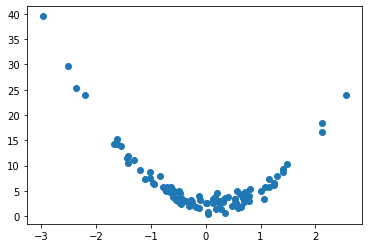

In [3]:
plt.scatter(x,y)

In [7]:
x_bilinmeyen=np.random.randn(20)
y_bilinmeyen=f(x_bilinmeyen)

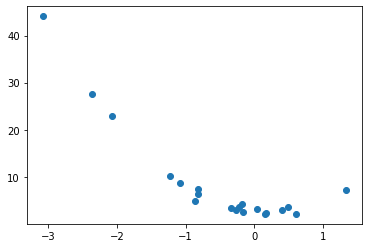

In [8]:
plt.scatter(x_bilinmeyen,y_bilinmeyen)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
transformator=PolynomialFeatures(3,include_bias=False)

In [22]:
transformator.fit(x.reshape(-1,1),y)

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')

In [23]:
xp=transformator.transform(x.reshape(-1,1))

In [24]:
model=LinearRegression()

In [25]:
model.fit(xp,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
model.intercept_ #kontrol maksatlı sabit değer

2.472630700396894

In [27]:
# f=lambda x:2.58 -1.26*x + 3.74*x**2 + np.random.randn(*x.shape)
model.coef_  #kontrol maksatlı katsayılar

array([-1.10989599e+00,  3.81393202e+00, -2.08476847e-04])

In [28]:
model.score(xp,y)

0.9806759908205591

In [29]:
xx=np.linspace(-3,3,100)
xxp=transformator.transform(xx.reshape(-1,1))
yy=model.predict(xxp)

Text(0.5, 1.0, 'baslık')

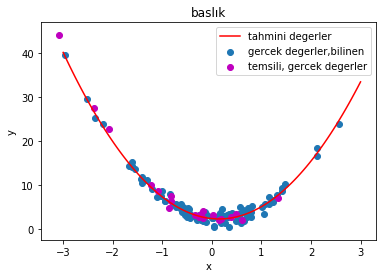

In [30]:
plt.plot(xx,yy,color='red',label='tahmini degerler')
plt.scatter(x,y,label='gercek degerler,bilinen')
plt.scatter(x_bilinmeyen,y_bilinmeyen,color='m',label='temsili, gercek degerler')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('baslık')

In [166]:
model.predict([[2,4,8]]) #ikinci yöntem

array([15.18110307])

In [167]:
model.predict(transformator.transform([[2]])) #pratik yöntem

array([15.18110307])

In [168]:
y_pred=model.predict(transformator.transform(x.reshape(-1,1)))

In [169]:
modelin_hatası=y-y_pred

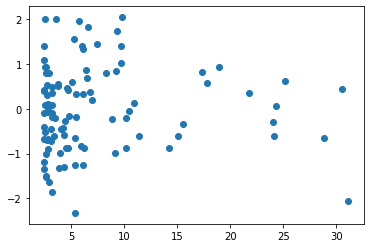

In [170]:
plt.scatter(y_pred,modelin_hatası)

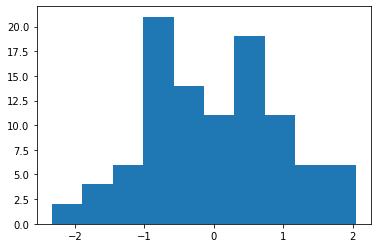

In [171]:
_=plt.hist(modelin_hatası)
# x verileri ne kadar fazla olursa grafik o kadar normale yakın olur